In [1]:
import csv
import itertools
with open("Conv_ansi.txt", "r") as in_f, open("Data.csv", "w") as out_f:
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    for line in in_f:
        if line[:3] in months:
            nextLine = next(in_f)
            nextnextLine = next(in_f)
            row = [line.strip('\n'), nextLine.strip('\n'), nextnextLine.strip('\n')]
            s = "|".join(row)
            out_f.write(s + "\n")

In [2]:
import pandas as pd
from datetime import datetime
df = pd.read_csv("Data.csv", sep="|", encoding = "ISO-8859-1", names= ["Date", "Sender", "Message"])
df[['Day_And_Month','Year_and_Time']] = df['Date'].str.split(',', expand=True)

df['Year'] = df['Year_and_Time'].str.split(' ', expand = True)[1]

df['Month'] = df['Day_And_Month'].str.split(' ', expand = True)[0]
df['Day'] = df['Day_And_Month'].str.split(' ', expand = True)[1]
df['Time'] = df['Year_and_Time'].str.split(' ', expand = True)[2]
df = df.drop(columns=['Date', 'Day_And_Month', 'Year_and_Time'])

df['Number of Words'] = df['Message'].apply(lambda x: len(str(x).split(' ')))
df['Number of Characters'] = df['Message'].str.len()
df.drop(26175, inplace=True)
df.drop(42195, inplace=True)
df['Date']= df.apply(lambda x:datetime.strptime("{0} {1} {2}".format(x['Year'],x['Month'], x['Day']), "%Y %b %d"),axis=1)

df = df.reindex(index=df.index[:: -1])
df = df.reset_index()
del df['index']
#df.head(10)

In [3]:
num_of_chloe_mes = (len(df[df['Sender'].str.contains('Chloe Chan')]))
num_of_morten_mes = len(df[df['Sender'].str.contains('Morten Hegewald')])
total_num_of_mes = num_of_morten_mes + num_of_chloe_mes

In [4]:
df_new = df.groupby(df['Date']).sum()
df_new2 = df.groupby(df['Date']).count()
df_new['Words per Message'] = (df_new['Number of Words']/df_new2['Message'])
df_new['Characters per Message'] = (df_new['Number of Characters']/df_new2['Message'])
# Remove outliers
df_new = df_new[df_new['Words per Message'] < 30]

In [5]:
import matplotlib.pyplot as plt
import numpy as np

people = ('Morten Hegewald', 'Chloe Chan')
y_pos = np.arange(len(people))
messages_total = [num_of_morten_mes, num_of_chloe_mes]

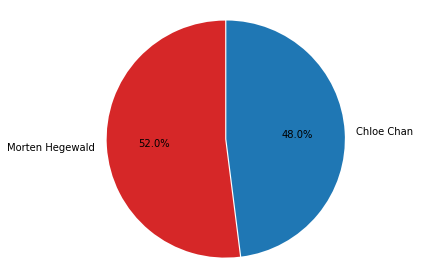

In [6]:
# Pie chart, split between messages sent in total
colors = ["tab:red", 'tab:blue']

plt.pie(
    messages_total,
    labels=people,
    shadow=False,
    colors=colors,
    explode = (0.0,0.01),
    startangle=90,
    autopct='%1.1f%%'
)

plt.axis('equal')

plt.tight_layout()
plt.show()

In [7]:
df_words_per_year = df.copy()
df_words_per_year['Date'] = pd.to_datetime(df_words_per_year['Date'], format='%Y-%m-%d')
df_words_per_year = df.groupby(['Sender','Year']).sum()
df_words_per_year = df_words_per_year.drop(['Dec 16, 2016 1:04am', 'Nov 23, 2016 5:53pm'])
df_words_per_year.head(35)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>Number of Words</th>
      <th>Number of Characters</th>
    </tr>
    <tr>
      <th>Sender</th>
      <th>Year</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top">Chloe Chan</th>
      <th>2016</th>
      <td>45707</td>
      <td>235526.0</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>99315</td>
      <td>510425.0</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>13287</td>
      <td>69796.0</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">Morten Hegewald</th>
      <th>2016</th>
      <td>48920</td>
      <td>254372.0</td>
    </tr>
    <tr>
      <th>2017</th>
      <td>110362</td>
      <td>562129.0</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>16485</td>
      <td>84557.0</td>
    </tr>
  </tbody>
</table>
</div>

In [8]:
num_of_chloe_words_2016 = df_words_per_year.iloc[0,0]
num_of_chloe_words_2017 = df_words_per_year.iloc[1,0]
num_of_chloe_words_2018 = df_words_per_year.iloc[2,0]

num_of_morten_words_2016 = df_words_per_year.iloc[3,0]
num_of_morten_words_2017 = df_words_per_year.iloc[4,0]
num_of_morten_words_2018 = df_words_per_year.iloc[5,0]

num_of_chloe_characters_2016 = df_words_per_year.iloc[0,1]
num_of_chloe_characters_2017 = df_words_per_year.iloc[1,1]
num_of_chloe_characters_2018 = df_words_per_year.iloc[2,1]

num_of_morten_characters_2016 = df_words_per_year.iloc[3,1]
num_of_morten_characters_2017 = df_words_per_year.iloc[4,1]
num_of_morten_characters_2018 = df_words_per_year.iloc[5,1]

total_num_of_words_2016 = num_of_chloe_words_2016 + num_of_morten_words_2016
total_num_of_words_2017 = num_of_chloe_words_2017 + num_of_morten_words_2017
total_num_of_words_2018 = num_of_chloe_words_2018 + num_of_morten_words_2018

words_2016 = (num_of_morten_words_2016, num_of_chloe_words_2016)
words_2017 = (num_of_morten_words_2017, num_of_chloe_words_2017)
words_2018 = (num_of_morten_words_2018, num_of_chloe_words_2018)

characters_2016 = (num_of_morten_characters_2016, num_of_chloe_characters_2016)
characters_2017 = (num_of_morten_characters_2017, num_of_chloe_characters_2017)
characters_2018 = (num_of_morten_characters_2018, num_of_chloe_characters_2018)

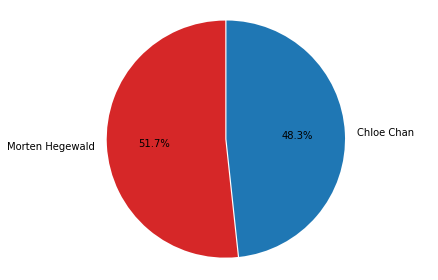

In [9]:
# Pie chart 201X words
colors = ["tab:red", 'tab:blue']

plt.pie(
    words_2016,
    labels=people,
    shadow=False,
    colors=colors,
    explode = (0.0,0.01),
    startangle=90,
    autopct='%1.1f%%'
)

plt.axis('equal')

plt.tight_layout()
plt.show()

In [10]:
# Creating data frame indicating number of messages sent per year, individually.
df_mes_per_year = df.groupby(['Sender', 'Year']).count()
df_mes_per_year = df_mes_per_year.drop(['Dec 16, 2016 1:04am', 'Nov 23, 2016 5:53pm'])

In [12]:
num_of_chloe_mes_2016 = df_mes_per_year.iloc[0,4]
num_of_chloe_mes_2017 = df_mes_per_year.iloc[1,4]
num_of_chloe_mes_2018 = df_mes_per_year.iloc[2,4]

num_of_morten_mes_2016 = df_mes_per_year.iloc[3,4]
num_of_morten_mes_2017 = df_mes_per_year.iloc[4,4]
num_of_morten_mes_2018 = df_mes_per_year.iloc[5,4]

mes_2016 = (num_of_morten_mes_2016, num_of_chloe_mes_2016)
mes_2017 = (num_of_morten_mes_2017, num_of_chloe_mes_2017)
mes_2018 = (num_of_morten_mes_2018, num_of_chloe_mes_2018)

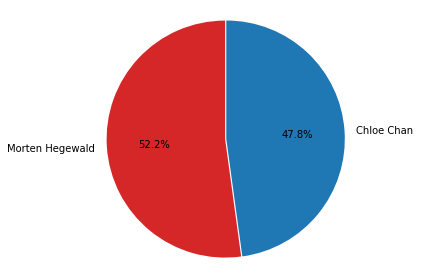

In [13]:
# Pia chart 201X messages split
colors = ["tab:red", 'tab:blue']

plt.pie(
    mes_2018,
    labels=people,
    shadow=False,
    colors=colors,
    explode = (0.0,0.01),
    startangle=90,
    autopct='%1.1f%%'
)

plt.axis('equal')

plt.tight_layout()
plt.show()

In [15]:
df_mes_per_day = df.groupby(['Date']).count()
#df_mes_per_day['Sender']

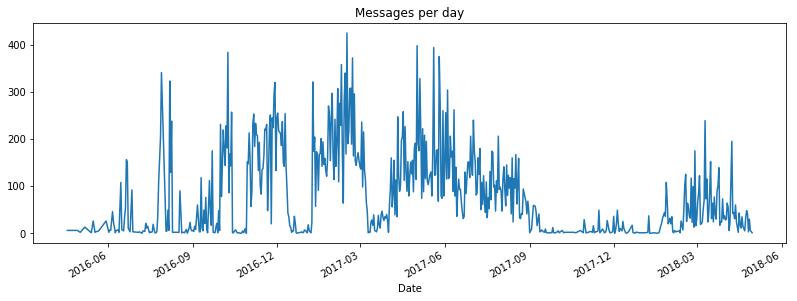

In [16]:
# Plotting the number of messages sent per day over time
%matplotlib inline
df_mes_per_day['Message'].plot(figsize=(13.5,4.5), title='Messages per day')

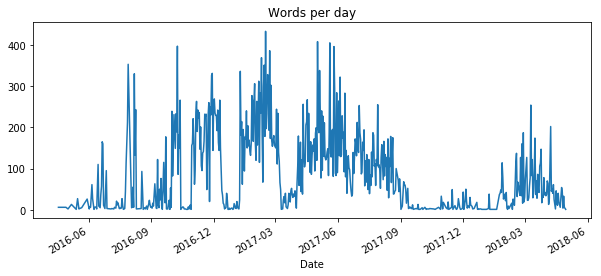

In [17]:
# Plotting the number of words sent per day over time. Trend very similar to number of messages per day.
df_mes_per_day['Number of Words'].plot(figsize=(10,4), title='Words per day')

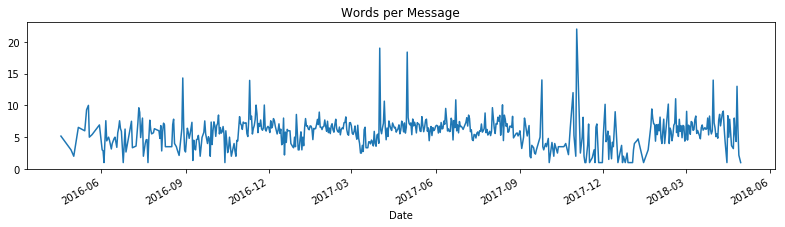

In [18]:
# Plotting the number of words sent per message over time
df_new['Words per Message'].plot(figsize=(13.4,3), title='Words per Message')

In [19]:
# Converting the AM/PM time formats from the Time column to a 24H format
df['24Time'] = pd.to_datetime(df['Time']).dt.strftime('%H:%M')

In [20]:
# Creating a data frame containing the values of how many messages were sent at a given minute
df_time = df.groupby('24Time').count()

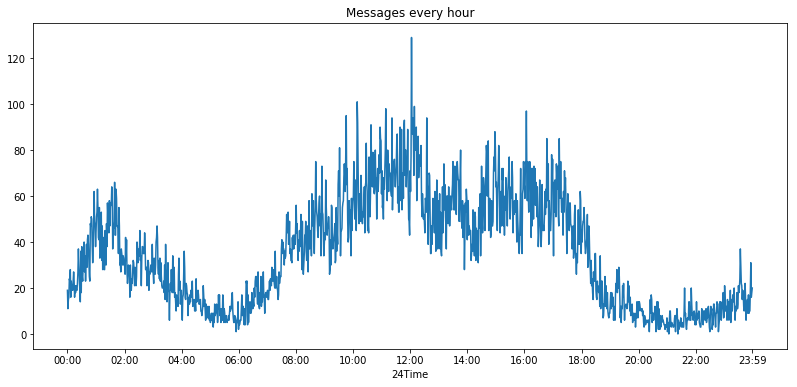

In [21]:
# Plotting the messages sent every hour
df_time['Message'].plot(figsize=(13.5,6), title='Messages every hour', visible=True, xticks=(0,120,240,359,479,599,719,839,959,1079,1199,1318,1437))

In [22]:
df_characters = df.groupby(['Sender', 'Year']).sum()
df_characters = df_characters.drop(['Dec 16, 2016 1:04am', 'Nov 23, 2016 5:53pm'])
morten_words_2016 = df_characters.iloc[0,0]
morten_words_2017 = df_characters.iloc[1,0]
morten_words_2018 = df_characters.iloc[2,0]

chloe_words_2016 = df_characters.iloc[3,0]
chloe_words_2017 = df_characters.iloc[4,0]
chloe_words_2018 = df_characters.iloc[5,0]

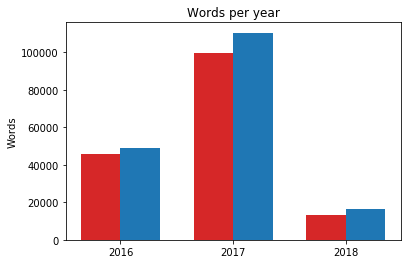

<Figure size 720x288 with 0 Axes>

In [23]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
morten_words = (morten_words_2016, morten_words_2017, morten_words_2018)


ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, morten_words, width, color='tab:red')

chloe_words = (chloe_words_2016, chloe_words_2017, chloe_words_2018)

rects2 = ax.bar(ind + width, chloe_words, width, color='tab:blue')

# add some text for labels, title and axes ticks
ax.set_ylabel('Words')
ax.set_title('Words per year')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('2016', '2017', '2018'))

plt.figure(figsize=(10,4))
plt.show()

In [24]:
#average number of words per message, variable creation.

morten_avg_words_per_mes_2016 = morten_words_2016/num_of_morten_mes_2016
morten_avg_words_per_mes_2017 = morten_words_2017/num_of_morten_mes_2017
morten_avg_words_per_mes_2018 = morten_words_2018/num_of_morten_mes_2018

chloe_avg_words_per_mes_2016 = chloe_words_2016/num_of_chloe_mes_2016
chloe_avg_words_per_mes_2017 = chloe_words_2017/num_of_chloe_mes_2017
chloe_avg_words_per_mes_2018 = chloe_words_2018/num_of_chloe_mes_2018

morten_avg_mes = (morten_avg_words_per_mes_2018, morten_avg_words_per_mes_2017, morten_avg_words_per_mes_2016)
chloe_avg_mes = (chloe_avg_words_per_mes_2016, chloe_avg_words_per_mes_2017, chloe_avg_words_per_mes_2018)

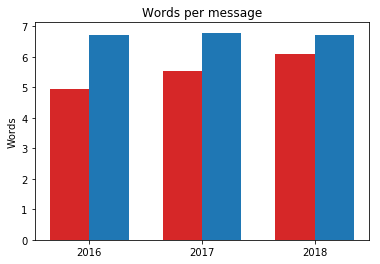

<Figure size 720x288 with 0 Axes>

In [25]:
# Another look at the number of words sent per message, individually.
import numpy as np
import matplotlib.pyplot as plt

N = 3

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, morten_avg_mes, width, color='tab:red')
rects2 = ax.bar(ind + width, chloe_avg_mes, width, color='tab:blue')

# add some text for labels, title and axes ticks
ax.set_ylabel('Words')
ax.set_title('Words per message')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('2016', '2017', '2018'))

plt.figure(figsize=(10,4))
plt.show()

In [26]:
## characters per message

morten_characters_per_message_2016 = num_of_morten_characters_2016/num_of_morten_mes_2016
morten_characters_per_message_2017 = num_of_morten_characters_2017/num_of_morten_mes_2017
morten_characters_per_message_2018 = num_of_morten_characters_2018/num_of_morten_mes_2018

morten_characters_per_message = (morten_characters_per_message_2016, morten_characters_per_message_2017, morten_characters_per_message_2018)

chloe_characters_per_message_2016 = num_of_chloe_characters_2016/num_of_chloe_mes_2016
chloe_characters_per_message_2017 = num_of_chloe_characters_2017/num_of_chloe_mes_2017
chloe_characters_per_message_2018 = num_of_chloe_characters_2018/num_of_chloe_mes_2018

chloe_characters_per_message = (chloe_characters_per_message_2016, chloe_characters_per_message_2017, chloe_characters_per_message_2018)

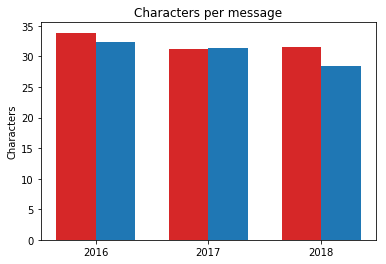

<Figure size 720x288 with 0 Axes>

In [28]:
# Examining the individual changes in number of characters sent per message
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 3

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, morten_characters_per_message, width, color='tab:red')

rects2 = ax.bar(ind + width, chloe_characters_per_message, width, color='tab:blue')

# add some text for labels, title and axes ticks
ax.set_ylabel('Characters')
ax.set_title('Characters per message')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('2016', '2017', '2018'))

plt.figure(figsize=(10,4))
plt.show()

In [29]:
# Create data frames to identify most used words
df_most_freq_words = df.copy()
# Convert all messages to strings
df_most_freq_words['Message'] = df_most_freq_words['Message'].astype(str)
# Isolate Chloe and Morten
df_most_frequent_words_morten = df_most_freq_words[df_most_freq_words['Sender'] != 'Chloe Chan']
df_most_frequent_words_chloe = df_most_freq_words[df_most_freq_words['Sender'] != 'Morten Hegewald']

In [30]:
# From the above data frames, extract the 10 most used words from each.
freq_words = pd.Series(' '.join(df_most_freq_words['Message']).lower().split()).value_counts()[:10]
freq_words_morten = pd.Series(' '.join(df_most_frequent_words_morten['Message']).lower().split()).value_counts()[:10]
freq_words_chloe = pd.Series(' '.join(df_most_frequent_words_chloe['Message']).lower().split()).value_counts()[:10]

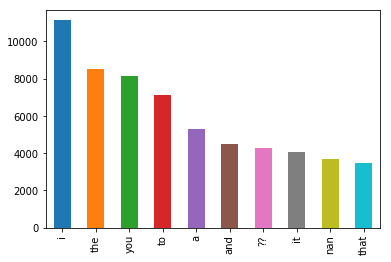

In [31]:
# Examining the overall most frequently used words
freq_words.plot(kind='bar')

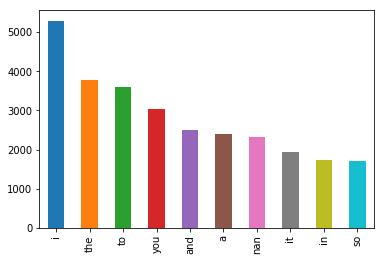

In [32]:
# Examining Chloe's most frequently used words
freq_words_chloe.plot(kind='bar')

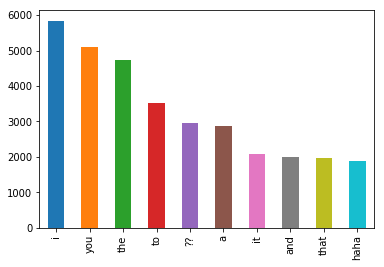

In [33]:
# Examining Morten's most frequently used words
freq_words_morten.plot(kind='bar')

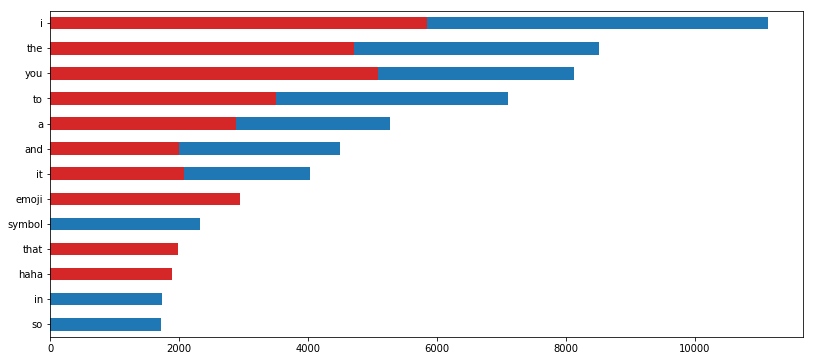

In [36]:
# Stacked bar plot of most frequently used words
freq_merged = pd.concat([freq_words_morten, freq_words_chloe], axis=1)
freq_merged.columns = ['Morten', 'Chloe']
# Rename a couple of inputs not interpreted correctly, or lost in translation from FB to Python.
freq_merged= freq_merged.rename({'??': 'emoji', 'nan': 'symbol'})
# Sort the columns by value, descending.
#freq_merged2 = freq_merged.loc[['i', 'the', 'you', 'to', 'a', 'and', 'it', 'emoji', 'symbol', 'that', 'haha', 'in', 'so']]
freq_merged2 = freq_merged.loc[['so', 'in', 'haha', 'that', 'symbol', 'emoji', 'it', 'and', 'a', 'to', 'you', 'the', 'i']]
#freq_merged2 = freq_merged2.reindex(index=df.index[:: -1])
freq_merged2.plot(kind='barh', stacked=True, color=(['tab:red', 'tab:blue']), figsize=(13.5,6), legend=None)

In [ ]:
# Identify the most active day
df_mes_per_month['Message'].idxmax()

Timestamp('2017-02-15 00:00:00')

In [94]:
# Indentify the activity level on the most active day

df_mes_per_month.loc['2017-02-15']

Sender                  433
Message                 425
Year                    433
Month                   433
Day                     433
Time                    433
Number of Words         433
Number of Characters    425
Name: 2017-02-15 00:00:00, dtype: int64

In [95]:
## 743 dage i alt
## 605 dage registreret
## i alt 54.161 beskeder sendt
## 89,5 beskeder i snit om dagen
## 334.080 ord sendt i alt
## 1.716.830 tegn sendt


#len(df_mes_per_month.index)
df_messages = df.copy()
#df_messages
df_messages = df_messages.groupby('Date').count()
df_messages['Sender'].sum()
(334080)/54159

6.168503849775661